In [27]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/32/07/3d355f71fb32f9d780d0099ece83dd10f0b9b71a9359cd468f3c25c52bfc/wordcloud-1.9.4-cp311-cp311-macosx_10_9_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.7/171.7 kB 1.7 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [58]:
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn.objects as so
from dotenv import load_dotenv
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from wordcloud import WordCloud
import seaborn as sns
import pandas as pd 
import boto3
import io
import os

load_dotenv()

True

In [133]:
bucket = os.getenv('AWS_BUCKET_NAME')
access_key_id = os.getenv('AWS_ACCESS_KEY_ID')
secret_key = os.getenv('AWS_PRIVATE_KEY')

s3_client = boto3.client(
        's3',
        aws_access_key_id=access_key_id,
        aws_secret_access_key=secret_key)

read_response = s3_client.get_object(Bucket=bucket, Key='EPL 2024-2025 xG.csv')

xG_df = pd.read_csv(io.BytesIO(read_response['Body'].read()))


In [134]:
xG_df['xGD cumulative sum'] = xG_df['xGD_sum_over_gameweek']

In [187]:
top5 = xG_df[xG_df['gameweek']==xG_df['gameweek'].max()].sort_values(by='xGD cumulative sum', ascending=False).head(5)

top5_xG_teams = top5['team'].unique()
top_5_xGD = xG_df[xG_df['team'].isin(top5_xG_teams)]


In [193]:
bottom5 = xG_df[xG_df['gameweek']==xG_df['gameweek'].max()].sort_values(by='xGD cumulative sum', ascending=True).head(5)

bottom5_xG_teams = bottom5['team'].unique()
bottom_5_xGD = xG_df[xG_df['team'].isin(bottom5_xG_teams)]

bottom_5_xGD.head()


,gameweek,date,team,xGA,xG,xGD,xGD_sum_over_gameweek,xGD cumulative sum
5,1.0,2024-08-17,Ipswich Town,2.6,0.5,-2.1,-2.1,-2.1
10,1.0,2024-08-17,Wolves,1.2,0.5,-0.7,-0.7,-0.7
12,1.0,2024-08-17,Southampton,0.3,1.8,1.5,1.5,1.5
15,1.0,2024-08-18,Crystal Palace,1.6,1.2,-0.4,-0.4,-0.4
18,1.0,2024-08-19,Leicester City,1.2,1.0,-0.2,-0.2,-0.2


In [188]:
top_5_xGD.head()

,gameweek,date,team,xGA,xG,xGD,xGD_sum_over_gameweek,xGD cumulative sum
2,1.0,2024-08-17,Arsenal,0.5,1.2,0.7,0.7,0.7
13,1.0,2024-08-17,Liverpool,0.5,2.6,2.1,2.1,2.1
14,1.0,2024-08-18,Manchester City,1.0,0.8,-0.2,-0.2,-0.2
17,1.0,2024-08-18,Chelsea,0.8,1.0,0.2,0.2,0.2
19,1.0,2024-08-19,Tottenham,1.0,1.2,0.2,0.2,0.2


In [189]:
so.Plot.config.theme.update(mpl.rcParams)


In [138]:
words = ['#ynwa', '#cfc', '#afc', '#lfc', '#mcfc']
file = open('words.txt','w')
for word in words:
	file.write(word+"\n")
file.close()

with open('words.txt', 'r') as textfile:
	words_txt = textfile.read()


In [139]:
wordcloud = WordCloud(width=800, height=400, background_color='white', max_font_size=100,
    font_step=2, colormap='magma').generate(words_txt)

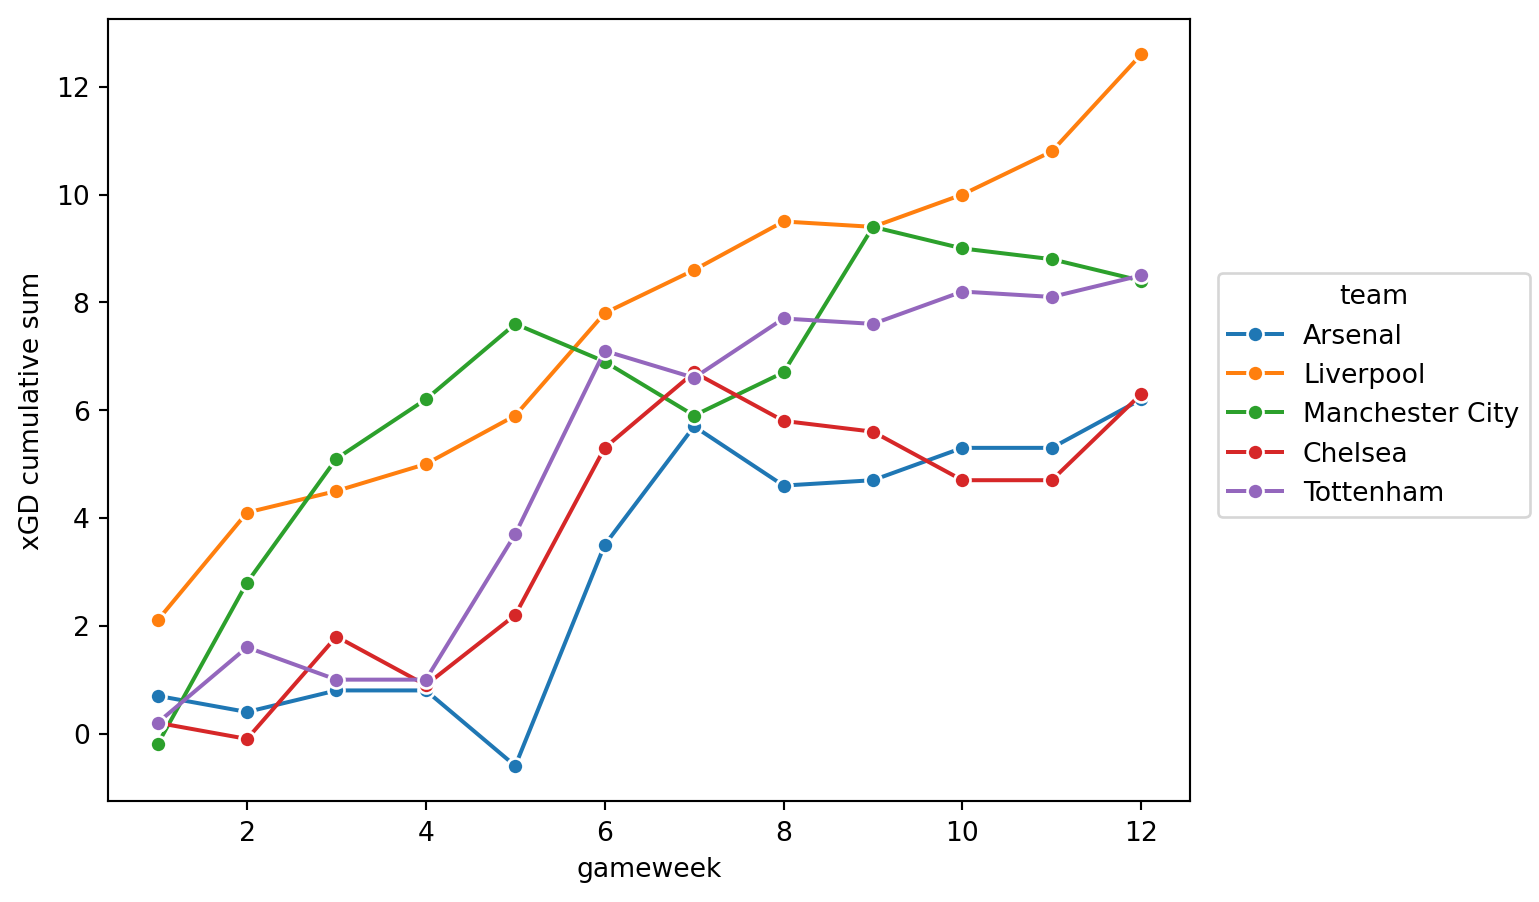

In [190]:

p = so.Plot(top_5_xGD, x='gameweek', y='xGD cumulative sum', color='team')
p.add(so.Line(), so.Agg())
p.add(so.Line(marker="o", edgecolor="w"), so.Agg(), linestyle=None)




In [141]:
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

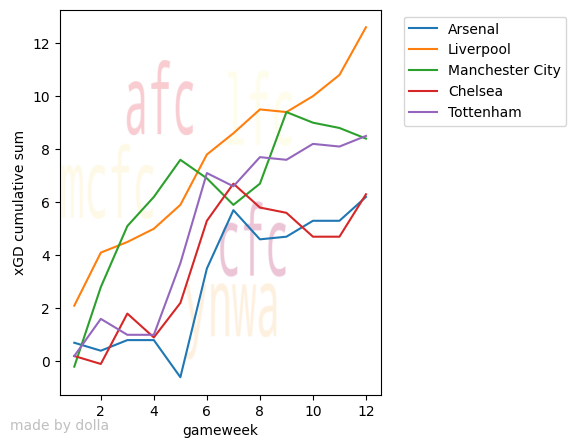

In [162]:
plt.figure(figsize=(14, 5))

palette = sns.color_palette("Blues", as_cmap=True)


ax = sns.lineplot(top_5_xGD, x='gameweek', y='xGD cumulative sum', hue='team')

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

plt.imshow(wordcloud, interpolation="bilinear", alpha=0.3, extent=[xmin, xmax, ymin, ymax])

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax.text(
    -0.0005, -0.08, 'made by dolla', 
    transform=ax.transAxes, fontsize=10, color='gray', alpha=0.5,
    ha='center', va='center'
)
plt.show()

In [117]:
pip install altair

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for altair from https://files.pythonhosted.org/packages/aa/f3/0b6ced594e51cc95d8c1fc1640d3623770d01e4969d29c0bd09945fafefa/altair-5.5.0-py3-none-any.whl.metadata
  Obtaining dependency information for jinja2 from https://files.pythonhosted.org/packages/31/80/3a54838c3fb461f6fec263ebf3a3a41771bd05190238de3486aae8540c36/jinja2-3.1.4-py3-none-any.whl.metadata
  Obtaining dependency information for jsonschema>=3.0 from https://files.pythonhosted.org/packages/69/4a/4f9dbeb84e8850557c02365a0eee0649abe5eb1d84af92a25731c6c0f922/jsonschema-4.23.0-py3-none-any.whl.metadata
  Obtaining dependency information for narwhals>=1.14.2 from https://files.pythonhosted.org/packages/ba/eb/988fdc5380e263f3f4ce40dd544720edc2ae5bd8f85c019ccdc6668399e5/narwhals-1.14.2-py3-none-any.whl.metadata
  Obtaining dependency information for jsonschema-specifications>=2023.03.6 from https://files.pythonhosted

In [203]:
import altair as alt

last_points = top_5_xGD.groupby('team').apply(lambda top_5_xGD: top_5_xGD[top_5_xGD['xGD cumulative sum'] == top_5_xGD['xGD cumulative sum'].max()]).reset_index(drop=True)

selection = alt.selection_point(fields=['team'], bind='legend')

lines = alt.Chart(top_5_xGD).mark_line().encode(
    x='gameweek', 
    y='xGD cumulative sum',
    color=alt.Color('team').legend(orient="left"), 
    opacity=alt.when(selection).then(alt.value(1)).otherwise(alt.value(0.2))
).add_params(selection)

text = alt.Chart(last_points).mark_text(align='left', dx=5).encode(
                                                                    x='gameweek', 
                                                                    y='xGD cumulative sum',
                                                                    text='team',
                                                                    color='team')

chart = lines+text

chart



alt.LayerChart(...)

In [208]:
last_points = bottom_5_xGD.groupby('team').apply(lambda bottom_5_xGD: bottom_5_xGD[bottom_5_xGD['xGD cumulative sum'] == bottom_5_xGD['xGD cumulative sum'].min()]).reset_index(drop=True)

selection = alt.selection_point(fields=['team'], bind='legend')

lines = alt.Chart(bottom_5_xGD).mark_line().encode(
    x='gameweek', 
    y='xGD cumulative sum',
    color=alt.Color('team').legend(orient="left"), 
    opacity=alt.when(selection).then(alt.value(1)).otherwise(alt.value(0.2))
).add_params(selection)

text = alt.Chart(last_points).mark_text(align='left', dx=5).encode(
                                                                    x='gameweek', 
                                                                    y='xGD cumulative sum',
                                                                    text='team',
                                                                    color='team')

chart = lines+text

chart

alt.LayerChart(...)